# Computational appendix of [arXiv:2305.xxxxx](https://www.arxiv.org/abs/2305.xxxxx)
---

In this notebook we generate Figure 3 in [arXiv:2304.xxxxx](https://www.arxiv.org/abs/2305.xxxxx) and create a three-dimensional visualization of the set of distributions identified as triangle-nonlocal using the 3-2-2 inflation of the triangle scenario.

Authors: Alejandro Pozas-Kerstjens

Requires: [matplotlib](https://matplotlib.org/) (with [ipympl](https://matplotlib.org/ipympl/) for 3-D), [numpy](https://numpy.org/), [seaborn](https://seaborn.pydata.org)

Last updated: May, 2023

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='white', font_scale=1.8)
plt.rcParams.update({'font.size': 30})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

data = np.loadtxt('points_E1E2E3.txt')

# NSI paper's data. Private communication from the authors of
# Nat. Commun. 11, 2378 (2020) [arXiv:1906.06495]
x = np.arange(0.18, 0.5, 0.01)
y = np.array([-0.3333, -0.3333, -0.3333, -0.3333, -0.3206,
              -0.3081, -0.2958, -0.2838, -0.2721, -0.2606,
              -0.2493, -0.2383, -0.2274, -0.2168, -0.2063,
              -0.1960, -0.1859, -0.1759, -0.1661, -0.1564,
              -0.1469, -0.1375, -0.1283, -0.1191, -0.1101,
              -0.1013, -0.0925, -0.0838, -0.0753, -0.0600,
              -0.0400, -0.0200])

# Region without well-defined distributions
x_bg = np.arange(1/3,0.5,0.01)
y_bg = 2*x_bg - 1

# Figure 3a

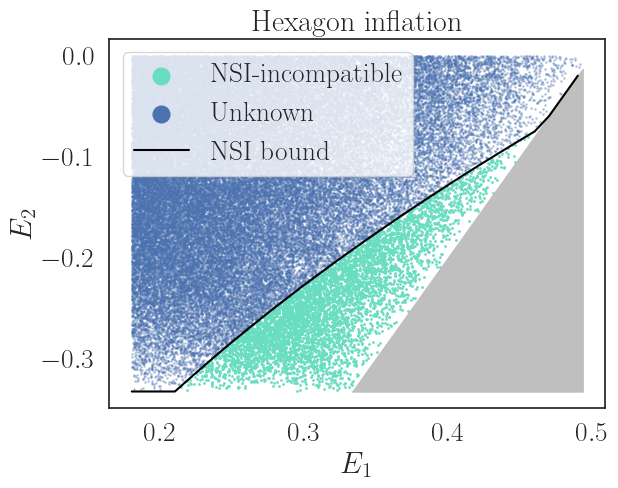

In [2]:
%matplotlib inline
feas = np.loadtxt('results/smallestPinf_hexagoninflation.txt')
discarded_idx = np.where(feas < 0.)[0]
non_discarded = list(set(range(len(data)))
                     - set(discarded_idx.tolist()))
plt.scatter(data[discarded_idx, 0], data[discarded_idx, 1],
            s=1, alpha=1, color="#69ddc0",
            label='NSI-incompatible')
plt.scatter(data[non_discarded, 0], data[non_discarded, 1],
            s=1, alpha=0.3,
            label='Unknown')
plt.plot(x, y, color='black', label='NSI bound')
plt.xlabel(r'$E_1$')
plt.ylabel(r'$E_2$')
plt.title('Hexagon inflation')
lgnd = plt.legend(loc=2, markerscale=12)
lgnd.legend_handles[1].set_alpha(1)

plt.fill_between(x_bg, y_bg, -1/3*np.ones_like(x_bg),
                 color="#bfbfbf")

plt.savefig('E1E2hexagon.pdf', bbox_inches='tight')

# Figure 3b

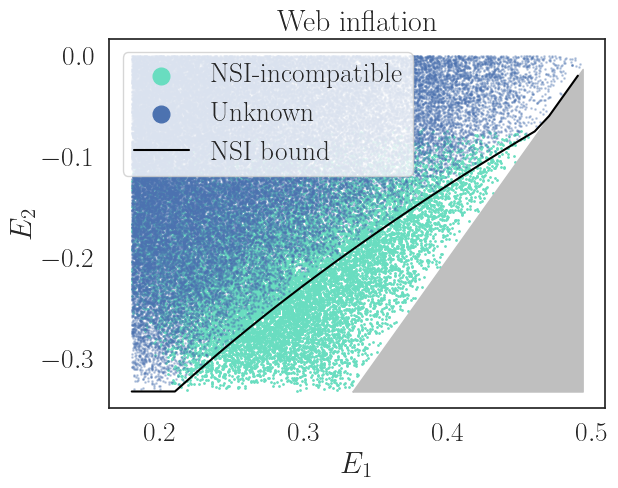

In [3]:
%matplotlib inline
feas = np.loadtxt('results/smallestPinf_222inflation.txt')
discarded_idx = np.where(feas < 0.)[0]
non_discarded = list(set(range(len(data)))
                     - set(discarded_idx.tolist()))
plt.scatter(data[discarded_idx, 0], data[discarded_idx, 1],
            s=1, alpha=1, color="#69ddc0",
            label='NSI-incompatible')
plt.scatter(data[non_discarded, 0], data[non_discarded, 1],
            s=1, alpha=0.3,
            label='Unknown')
plt.plot(x, y, color='black', label='NSI bound')
plt.xlabel(r'$E_1$')
plt.ylabel(r'$E_2$')
plt.title('Web inflation')
lgnd = plt.legend(loc=2, markerscale=12)
lgnd.legend_handles[1].set_alpha(1)

plt.fill_between(x_bg, y_bg, -1/3*np.ones_like(x_bg),
                 color="#bfbfbf")

plt.savefig('E1E2web.pdf', bbox_inches='tight')

# Exploration of the E1-E2-E3 space

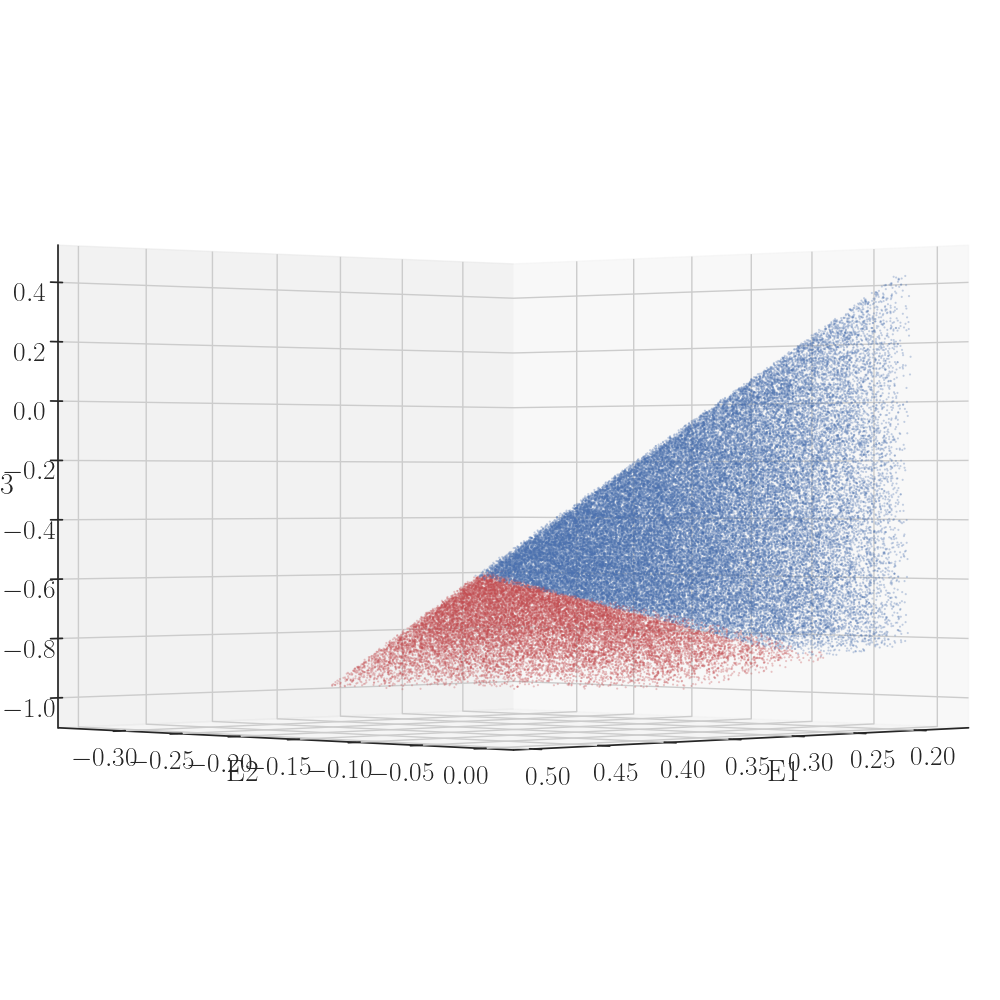

In [4]:
%matplotlib ipympl

feas = np.loadtxt('results/smallestPinf_322inflation.txt')

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.scatter(data[:,0], data[:,1], data[:,2],
           color=['r' if point < 0 else 'b' for point in feas],
           alpha=0.3,
           s=0.3)

ax.set_xlabel('E1')
ax.set_ylabel('E2')
ax.set_zlabel('E3')

ax.view_init(0, 45)

plt.show()